## Observations and Insights 

In [310]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineStudy_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combineStudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [311]:
# Checking the number of mice.
miceNumber = combineStudy_df.count()
print(miceNumber)

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


In [312]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice = combineStudy_df["Mouse ID"].unique()
num_unique_mice = len(unique_mice)
print(num_unique_mice)

duplicate_mice = combineStudy_df.duplicated(subset=["Mouse ID", "Timepoint"])

duplicate_ids = combineStudy_df.loc[duplicate_mice]
print(duplicate_ids["Mouse ID"].unique())

duplicate_ids.head()


249
['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [313]:
# Optional: Get all the data for the duplicate mouse ID. 



In [314]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combStudy_minus_duplicates_df = combineStudy_df.drop_duplicates()
combStudy_minus_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [315]:
# Checking the number of mice in the clean DataFrame.
combStudy_minus_duplicates_df.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

## Summary Statistics

In [316]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumorData = combStudy_minus_duplicates_df["Tumor Volume (mm3)"].mean()
#print(mean_tumorData)

median_tumorData = combStudy_minus_duplicates_df["Tumor Volume (mm3)"].median()
#print(median_tumorData)

variance_tumorData = combStudy_minus_duplicates_df["Tumor Volume (mm3)"].var()
#print(variance_tumorData)

standard_Deviation_tumorData = combStudy_minus_duplicates_df["Tumor Volume (mm3)"].std()
#print(standard_Deviation_tumorData)

sem_tumorData = combStudy_minus_duplicates_df["Tumor Volume (mm3)"].sem()
#print(sem_tumorData)






# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimenMean = combStudy_minus_duplicates_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
regimenMean


regimenMedian = combStudy_minus_duplicates_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
regimenMedian

regimenVariance = combStudy_minus_duplicates_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
regimenVariance

regimenStandard_deviation = combStudy_minus_duplicates_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
regimenStandard_deviation

regimen_sem = combStudy_minus_duplicates_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
regimen_sem
summary_statistics_df = pd.DataFrame({
      "Tumor Volume Mean": [regimenMean],
      "Tumor Volume Median": [regimenMedian],
      "Tumor Volume Variance": [regimenVariance],
      "Tumor Volume Standard Deviation": [regimenStandard_deviation],
      "Tumor Volume SEM": [regimen_sem]
})

summary_statistics_df.head
regimen_summary_group =  combStudy_minus_duplicates_df.groupby('Drug Regimen')
summary_Stats_df = regimen_summary_group.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_Stats_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [317]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


regimen_summary_group =  combStudy_minus_duplicates_df.groupby('Drug Regimen')
summary_Stats_df = regimen_summary_group.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_Stats_df
# regimen_summary_stats_df = pd.DataFrame({
#        "Tumor Volume Mean": [regimenMean],
#        "Tumor Volume Median": [regimenMedian],
#        "Tumor Volume Variance": [regimenVariance],
#        "Tumor Volume Standard Deviation": [regimenStandard_deviation],
#        "Tumor Volume SEM": [regimen_sem]
#  })

# regimen_summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

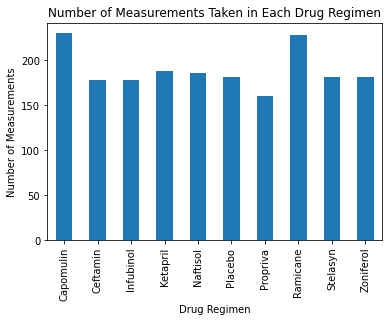

In [318]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_count = combStudy_minus_duplicates_df.groupby('Drug Regimen').count()["Tumor Volume (mm3)"]
bar_count
bar_count_plot = bar_count.plot(kind="bar")
plt.title("Number of Measurements Taken in Each Drug Regimen")
plt.ylabel("Number of Measurements")

In [319]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_count = combStudy_minus_duplicates_df.groupby('Drug Regimen').count()["Tumor Volume (mm3)"]
bar_count
bar_count_plot = plt.bar(#x variable, y variable
plt.title("Number of Measurements Taken in Each Drug Regimen")
plt.ylabel("Number of Measurements")


SyntaxError: invalid syntax (<ipython-input-319-7dab54009b2a>, line 6)

In [320]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [321]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderGroup = combStudy_minus_duplicates_df.groupby(["Mouse ID", "Sex"])
genderGroup
group_gender_df = pd.DataFrame(genderGroup.size())
group_gender_df
MouseGender = pd.DataFrame(group_gender_df.groupby(["Sex"]).count())
MouseGender.columns = ["Total Count"]
MouseGender


,Total Count
Sex,
Female,124
Male,125


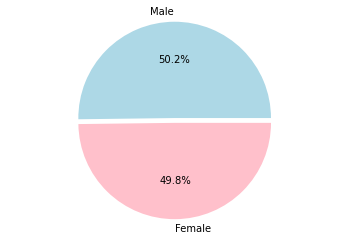

In [322]:
sex = ["Male", 'Female']
Gender_count = [125, 124]
colors = ["lightblue", "pink"]
explode = (0.05,0)
plt.pie(Gender_count, explode = explode, labels = sex, autopct = "%1.1f%%", colors = colors)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [323]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = combStudy_minus_duplicates_df.loc[combStudy_minus_duplicates_df["Drug Regimen"]=="Capomulin",:]
Capomulin_data
Ramicane_data = combStudy_minus_duplicates_df.loc[combStudy_minus_duplicates_df["Drug Regimen"]=="Ramicane",:]
Ramicane_data
Infubinol_data = combStudy_minus_duplicates_df.loc[combStudy_minus_duplicates_df["Drug Regimen"]=="Infubinol",:]
Infubinol_data
Ceftamin_data = combStudy_minus_duplicates_df.loc[combStudy_minus_duplicates_df["Drug Regimen"]=="Ceftamin",:]
Ceftamin_data
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_greatestTimep = Capomulin_data.groupby("Mouse ID").max()["Timepoint"]
Capomulin_Tumorvol = pd.DataFrame(Capomulin_greatestTimep)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_combined = pd.merge(Capomulin_greatestTimep, combStudy_minus_duplicates_df, on=("Mouse ID", "Timepoint"))
Capomulin_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [324]:
#Ramicane

Ramicane_data = combStudy_minus_duplicates_df.loc[combStudy_minus_duplicates_df["Drug Regimen"]=="Ramicane"]
Ramicane_data
Ramicane_greatestTimep = Ramicane_data.groupby("Mouse ID").max()["Timepoint"]
Ramicane_Tumorvol = pd.DataFrame(Capomulin_greatestTimep)
#merge
Ramicane_combined = pd.merge(Ramicane_greatestTimep, combStudy_minus_duplicates_df, on=("Mouse ID", "Timepoint"))
Ramicane_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [325]:
#Infubinol
Infubinol_data = combStudy_minus_duplicates_df.loc[combStudy_minus_duplicates_df["Drug Regimen"]=="Infubinol",:]
Infubinol_data
Infubinol_greatestTimep = Infubinol_data.groupby("Mouse ID").max()["Timepoint"]
Infubinol_Tumorvol = pd.DataFrame(Infubinol_greatestTimep)
#merge
Infubinol_combined = pd.merge(Infubinol_greatestTimep, combStudy_minus_duplicates_df, on=("Mouse ID", "Timepoint"))
Infubinol_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [326]:
#Ceftamin
Ceftamin_data = combStudy_minus_duplicates_df.loc[combStudy_minus_duplicates_df["Drug Regimen"]=="Ceftamin",:]
Ceftamin_data
Ceftamin_greatestTimep = Ceftamin_data.groupby("Mouse ID").max()["Timepoint"]
#merge
ceftamin_combined = pd.merge(Ceftamin_greatestTimep, combStudy_minus_duplicates_df, on=("Mouse ID", "Timepoint"))
ceftamin_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [327]:
#Capomulin quartiles
Capomulin_tumorquart = Capomulin_combined["Tumor Volume (mm3)"]
Capomulin_quartiles = Capomulin_tumorquart.quantile([.25, .5, .75])
Capo_lowerq = Capomulin_quartiles[.25]
Capo_upperq = Capomulin_quartiles[.75]
Capo_iqr = Capo_upperq - Capo_lowerq



print(f"The lower quartile of Capomulin Tumor Volume (mm3) is: {Capo_lowerq}")
print(f"The upper quartile of Capomulin Tumor Volume (mm3) is: {Capo_upperq}")
print(f"The interquartile range of Capomulin Tumor Volume (mm3) is: {Capo_iqr}")
print(f"The the median of Capomulin Tumor Volume (mm3) is: {Capomulin_quartiles[0.5]} ")

#bounds

lower_bound = Capo_lowerq - (1.5*Capo_iqr)
upper_bound = Capo_upperq + (1.5*Capo_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin Tumor Volume (mm3) is: 32.37735684
The upper quartile of Capomulin Tumor Volume (mm3) is: 40.1592203
The interquartile range of Capomulin Tumor Volume (mm3) is: 7.781863460000004
The the median of Capomulin Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [328]:
#Ramicane Quartiles
Ramicane_tumorquart = Ramicane_combined["Tumor Volume (mm3)"]
Ramicane_quartiles = Ramicane_tumorquart.quantile([.25, .5, .75])
Ramic_lowerq = Ramicane_quartiles[.25]
Ramic_upperq = Ramicane_quartiles[.75]
Ramic_iqr = Ramic_upperq - Ramic_lowerq


print(f"The lower quartile of Ramicane Tumor Volume(mm3) is: {Ramic_lowerq}")
print(f"The upper quartile of Ramicane Tumor Volume (mm3) is: {Ramic_upperq}")
print(f"The interquartile range of Ramicane Tumor Volume (mm3) is: {Ramic_iqr}")
print(f"The median of Ramicane Tumor Volume (mm3) is: {Ramicane_quartiles[0.5]}")

#bounds
lower_bound = Ramic_lowerq - (1.5*Ramic_iqr)
upper_bound = Ramic_upperq + (1.5*Ramic_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane Tumor Volume(mm3) is: 31.56046955
The upper quartile of Ramicane Tumor Volume (mm3) is: 40.65900627
The interquartile range of Ramicane Tumor Volume (mm3) is: 9.098536719999998
The median of Ramicane Tumor Volume (mm3) is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [329]:
Infubinol_tumorquart = Infubinol_combined["Tumor Volume (mm3)"]
Infubinol_quartiles = Infubinol_tumorquart.quantile([.25, .5, .75])
Infu_lowerq = Infubinol_quartiles[.25]
Infu_upperq = Infubinol_quartiles[.75]
Infu_iqr = Infu_upperq - Infu_lowerq


print(f"The lower quartile of Infubinol Tumor Volume(mm3) is: {Infu_lowerq}")
print(f"The upper quartile of Infubinol Tumor Volume (mm3) is: {Infu_upperq}")
print(f"The interquartile range of Infubinol Tumor Volume (mm3) is: {Infu_iqr}")
print(f"The median of Infubinol Tumor Volume (mm3) is: {Infubinol_quartiles[0.5]}")

#bounds
lower_bound = Infu_lowerq - (1.5*Infu_iqr)
upper_bound = Infu_upperq + (1.5*Infu_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol Tumor Volume(mm3) is: 54.04860769
The upper quartile of Infubinol Tumor Volume (mm3) is: 65.52574285
The interquartile range of Infubinol Tumor Volume (mm3) is: 11.477135160000003
The median of Infubinol Tumor Volume (mm3) is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [330]:
#ceftamin quartiles

ceftamin_tumorquart = ceftamin_combined["Tumor Volume (mm3)"]
ceftamin_quartiles = ceftamin_tumorquart.quantile([.25, .5, .75])
ceft_lowerq = ceftamin_quartiles[.25]
ceft_upperq = ceftamin_quartiles[.75]
ceft_iqr = ceft_upperq - ceft_lowerq


print(f"The lower quartile of Ceftamin Tumor Volume(mm3) is: {ceft_lowerq}")
print(f"The upper quartile of Ceftamin Tumor Volume (mm3) is: {ceft_upperq}")
print(f"The interquartile range of Ceftamin Tumor Volume (mm3) is: {ceft_iqr}")
print(f"The median of Ceftamin Tumor Volume (mm3) is: {ceftamin_quartiles[0.5]}")

#bounds
lower_bound = ceft_lowerq - (1.5*ceft_iqr)
upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin Tumor Volume(mm3) is: 48.72207785
The upper quartile of Ceftamin Tumor Volume (mm3) is: 64.29983003
The interquartile range of Ceftamin Tumor Volume (mm3) is: 15.577752179999997
The median of Ceftamin Tumor Volume (mm3) is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


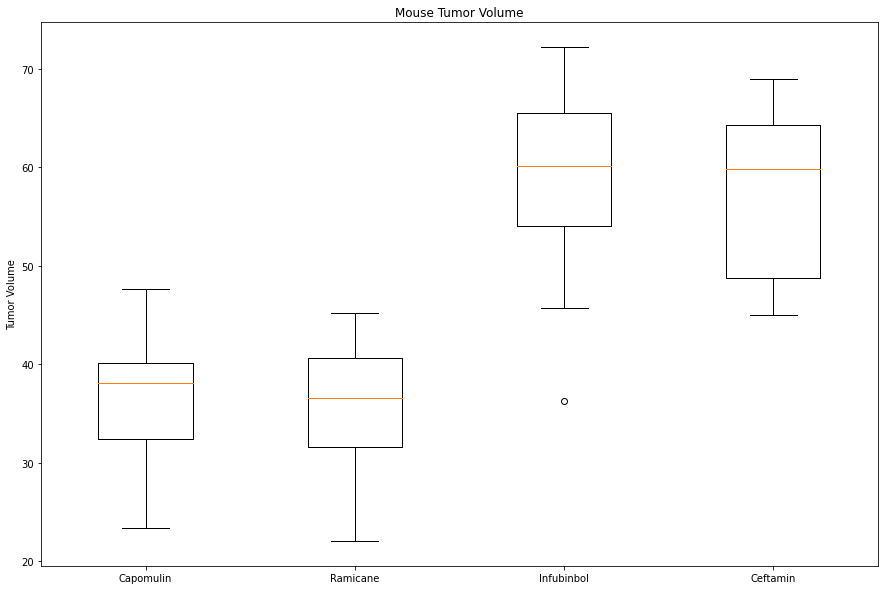

In [331]:
#Box Plot

Quartiles_data_plot = [Capomulin_tumorquart, Ramicane_tumorquart, Infubinol_tumorquart, ceftamin_tumorquart]
drug_Regimen = ["Capomulin", "Ramicane", "Infubinbol", "Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title('Mouse Tumor Volume')
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(Quartiles_data_plot, labels = drug_Regimen)
plt.show()

In [332]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [333]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [334]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_linedf = Capomulin_data.loc[Capomulin_data["Mouse ID"]=="b128"]
Capomulin_linedf.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


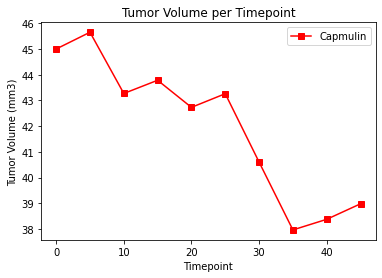

In [335]:
x = Capomulin_linedf["Timepoint"]
y = Capomulin_linedf["Tumor Volume (mm3)"]


plt.plot(x, y, color="red", marker = "s", label="Capmulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume per Timepoint")
plt.legend()

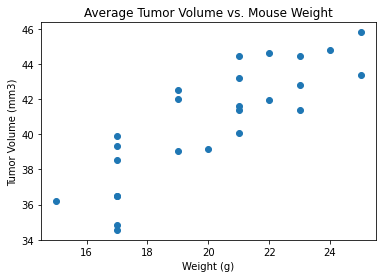

In [336]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_average = Capomulin_data.groupby(["Mouse ID"]).mean()
Capomulin_average

plt.scatter(Capomulin_average["Weight (g)"], Capomulin_average["Tumor Volume (mm3)"])

plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [337]:
Capomulin_data
Capomulin_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Correlation and Regression

In [338]:
# Calculate the correlation coefficient and linear regression model 
Weight = Capomulin_data.iloc[:,5]
Tumor_Vol = Capomulin_data.iloc[:,7]
# plt.scatter(Weight, Tumor_Vol)
correlation =st.pearsonr(Weight, Tumor_Vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# print(correlation)


# income = who_data.iloc[:,1]
# alcohol = who_data.iloc[:,8]
# correlation = st.pearsonr(income,alcohol)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both factors is 0.58


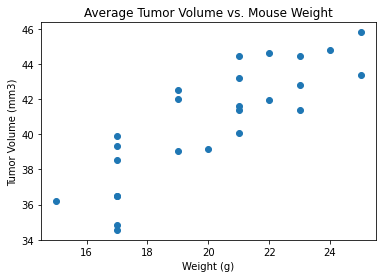

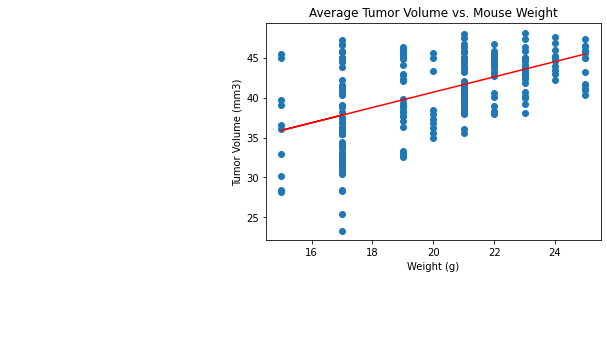

In [341]:
#regression

x_values = Capomulin_data['Weight (g)']
y_values = Capomulin_data['Tumor Volume (mm3)']
# plt.scatter(x_values,y_values)
# plt.xlabel('Weight (g)')
# plt.ylabel('Tumor Volume (mm3)')
# plt.show()

plt.scatter(Capomulin_average["Weight (g)"], Capomulin_average["Tumor Volume (mm3)"])

plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()